In [1]:
import pandas as pd
import numpy as np
from glob import glob
import re
import matplotlib.pyplot as plt

In [2]:
files = glob("states*")
us_census = pd.concat((pd.read_csv(file) for file in files),ignore_index=True)
us_census.head(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [3]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [4]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [8]:
us_census.drop(columns=["Unnamed: 0"],inplace=True)

In [12]:
us_census[["Male","Female"]]=us_census.GenderPop.str.split("_",expand=True)

In [14]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,19087135M,19334329F


In [15]:
us_census.drop(columns=["GenderPop"],inplace=True)

In [16]:
us_census["Income"]=us_census.Income.str.strip("$")

In [17]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M,19334329F


In [18]:
us_census = us_census.replace("%","",regex=True)

In [19]:
us_census = us_census.replace("F","",regex=True)

In [20]:
us_census = us_census.replace("M","",regex=True)

In [22]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135,19334329


In [25]:
us_census.loc[:,"Hispanic":"Income"]=round(us_census.loc[:,"Hispanic":"Income"].apply(pd.to_numeric),2)

In [26]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [27]:
us_census["Male"] = us_census["Male"].astype(int)

In [28]:
us_census.drop(columns=["Female"],inplace=True)

In [29]:
us_census["Female"] = us_census["TotalPop"]-us_census["Male"] 

In [30]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int32
Female        int64
dtype: object

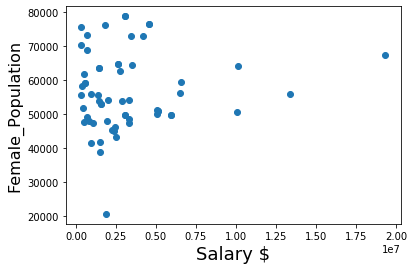

In [32]:
plt.scatter(us_census["Female"],us_census["Income"])
plt.xlabel("Salary $",fontsize=18)
plt.ylabel("Female_Population",fontsize=16)
plt.show()

In [33]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [36]:
us_census.drop_duplicates(inplace=True)

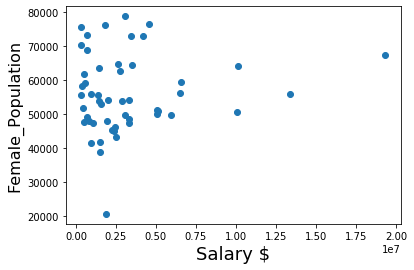

In [37]:
plt.scatter(us_census["Female"],us_census["Income"])
plt.xlabel("Salary $",fontsize=18)
plt.ylabel("Female_Population",fontsize=16)
plt.show()

In [38]:
histo = round(us_census.loc[:,"Hispanic":"Pacific"].apply(lambda x:x*us_census["TotalPop"]/100))

In [39]:
histo.head()

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0


In [40]:
histo.fillna(method="bfill",inplace=True)

In [41]:
histo.astype((int))

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,719
7,560543,2431893,371898,4671,144448,719
8,81713,598767,192147,2409,30295,194
9,59374,214317,335267,1295,21885,194
10,4192408,11606722,2980264,41256,447924,9823


In [42]:
histo["total_pop"]=us_census["TotalPop"]
histo["state"]= us_census["State"]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D95FE2C7C8>]],
      dtype=object)

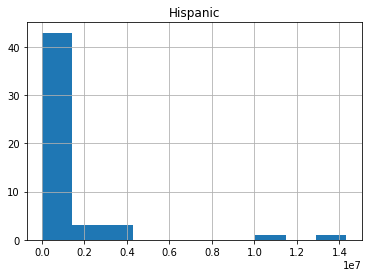

In [45]:
histo.hist(column="Hispanic")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D95FE9A9C8>]],
      dtype=object)

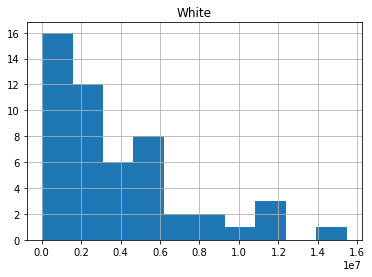

In [46]:
histo.hist(column="White")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D95FF373C8>]],
      dtype=object)

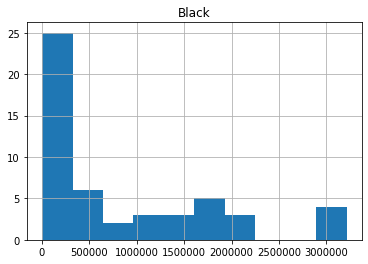

In [47]:
histo.hist(column="Black")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D95FF98708>]],
      dtype=object)

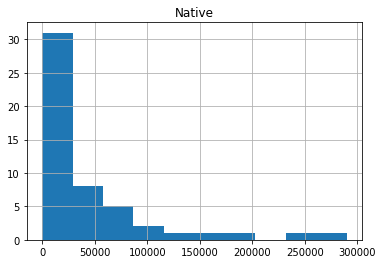

In [48]:
histo.hist(column="Native")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D96003C308>]],
      dtype=object)

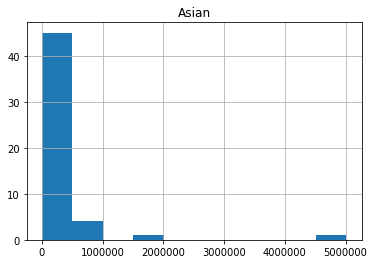

In [49]:
histo.hist(column="Asian")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D961071708>]],
      dtype=object)

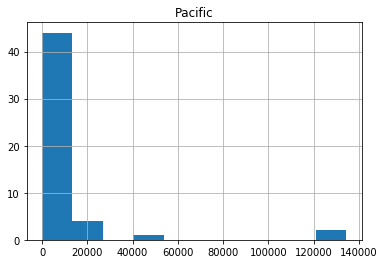

In [50]:
histo.hist(column="Pacific")